# "Mari Berjoget Bersama"
> "Sedikit dosis pendar bling-bling dalam grafik Anda"

- toc: false
- branch: master
- badges: true
- comments: true
- author: Ali Akbar
- categories: [statis]

![Dangdut Top](https://i.scdn.co/image/ab67706f000000028eef21667caaf1a37e9997c6 "Sumber: Spotify")

Di pos kali ini, saya hanya mau menunjukkan beberapa konfigurasi yang mungkin menarik untuk Anda gunakan dalam grafik Anda. Gaya ini baru ada di bulan Maret 2020 dan langsung jadi salah satu favorit saya: [`mplcyberpunk`](https://github.com/dhaitz/mplcyberpunk). Berhubung saya agak kesulitan mencari dataset yang masih bisa dihitung konten lokal tapi bisa mewakili pendar dari gaya ini, maka mari kita coba mengeksplorasi dataset yang biasa kita korelasikan dengan warna berpendar dan *ngejreng* di Indonesia: **dangdut**.

Data di pos ini diambil menggunakan [Audio Features API](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/) dari Spotify. Tidak semua fiturnya akan saya bahas di sini, karena fokusnya adalah di gaya penampilan grafiknya. Bagaimana pun, biar lengkap, saya akan mencoba membandingkan tiga *playlist* dari Musik Indonesia dari Spotify: **Dangdut Top**, **Dangdut Lawas**, dan **Dangdut Laris Manis**.

In [132]:
#collapse-hide

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import mplcyberpunk

plt.style.use('cyberpunk')
plt.rcParams['font.size'] = 16
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (12,7)
%config InlineBackend.figure_format = 'retina'

def get_audio_features(playlist, token):
    headers = {
        "Authorization": "Bearer {}".format(token)
    }
    
    resp = requests.get("https://api.spotify.com/v1/playlists/{}/tracks".format(playlist), headers=headers)
    items = resp.json()['items']
    titles = [item['track']['name'] for item in items]
    artist_list = []
    for artists in [item['track']['artists'] for item in items]:
        artist_list.append(', '.join([artist['name'] for artist in artists]))
    
    ids = [item['track']['id'] for item in items]
    resp = requests.get("https://api.spotify.com/v1/audio-features?ids={}".format(','.join(ids)), headers=headers)
    df = pd.DataFrame(resp.json()['audio_features'])
    df['artists'] = artist_list
    df['title'] = titles
    return df

def draw_density(column):
    ax = plt.gca()
    labels = []
    for label, group in df.groupby('playlist'):
        sns.distplot(group[column], hist=False, label=label)
        labels.append(label.replace('_', ' '))
    plt.ylabel('density')
    mplcyberpunk.add_glow_effects()
    plt.legend(labels)

def draw_trend(column):
    ax = plt.gca()
    df.groupby('playlist')[column].plot.line()
    mplcyberpunk.make_lines_glow()
    plt.legend(['dangdut laris manis', 'dangdut lawas', 'dangdut top'])
    plt.xlabel('track number')
    plt.ylabel(column)

dangdut_top = "37i9dQZF1DWUWbdikWtt34"
dangdut_lawas = "37i9dQZF1DX7NZzYCEKYgA"
dangdut_laris_manis = "37i9dQZF1DXchLe2S7NIQn"
token = "" # token bisa diambil dari https://developer.spotify.com/console/get-audio-features-track/

df_top = get_audio_features(dangdut_top, token)
df_top['playlist'] = 'dangdut_top'
df_lawas = get_audio_features(dangdut_lawas, token)
df_lawas['playlist'] = 'dangdut_lawas'
df_laris = get_audio_features(dangdut_laris_manis, token)
df_laris['playlist'] = 'dangdut_laris_manis'

df = pd.concat([
    df_top,
    df_lawas,
    df_laris
])

Berdasarkan fitur `danceability` atau seberapa *jogetable* - dengan 1.0 adalah paling *jogetable*, ternyata playlist Dangdut Top dan Dangdut Laris Manis cenderung lebih besar nilainya dibandingkan Dangdut Lawas. Kalau seingat saya, dangdut lawas memang biasanya yang lebih menyayat hati dan sendu. Di bawah ini adalah grafik yang menggambarkan distribusi dari fitur `danceability`.

*By the way*, asyik kan grafiknya jadi berpendar begitu?

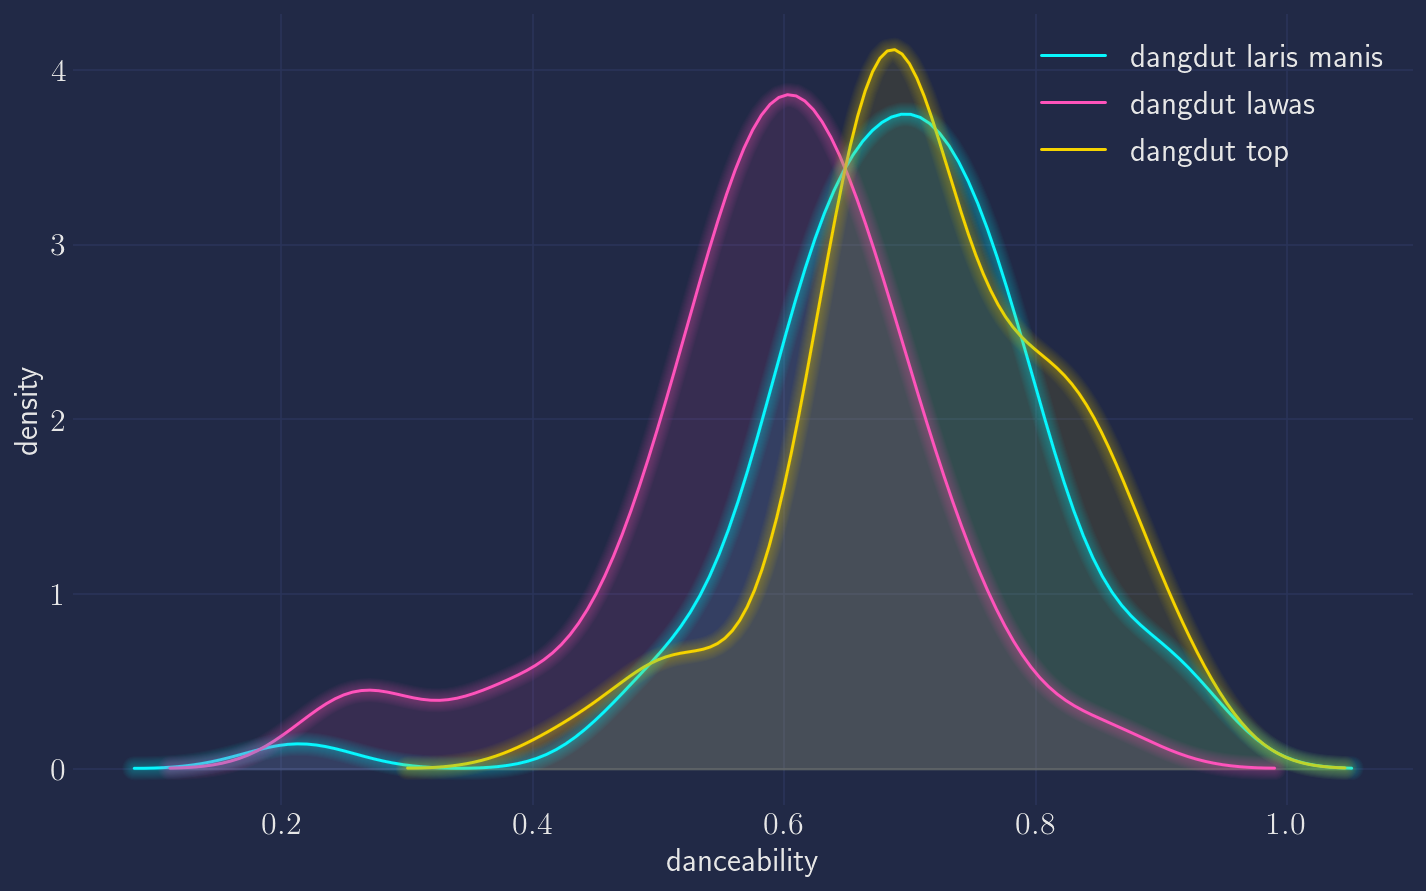

In [161]:
#collapse-hide

draw_density('danceability')

Selain bisa dibuat berpendar dan ada *shade*-nya, kita bisa membuat grafiknya hanya berpendar di garisnya saja. Kali ini, kita mencoba melihat progresi dari `danceability` seiring dengan diputarnya lagu demi lagu di ketiga *playlist*. Dari grafik di bawah, semuanya terlihat dibuat fluktuatif oleh Spotify.

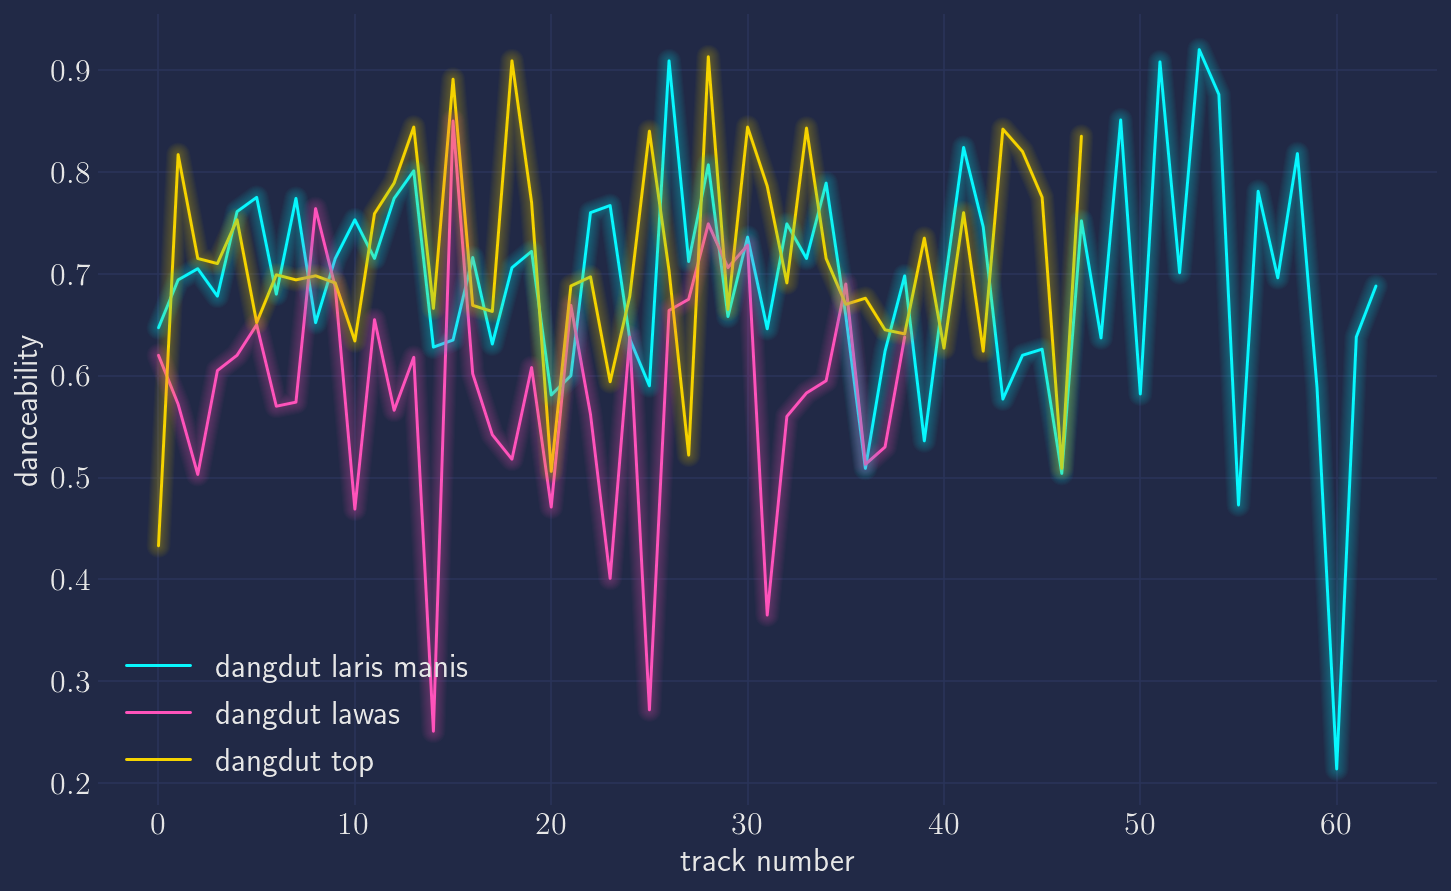

In [162]:
#collapse-hide

draw_trend('danceability')

Fitur lain yang saya temukan menarik adalah `tempo`. Di grafik di bawah ini dapat dilihat bahwa Dangdut Lawas cenderung lebih variatif temponya dibandingkan Dangdut Top yang rata-ratanya di sekitar 131 BPM.

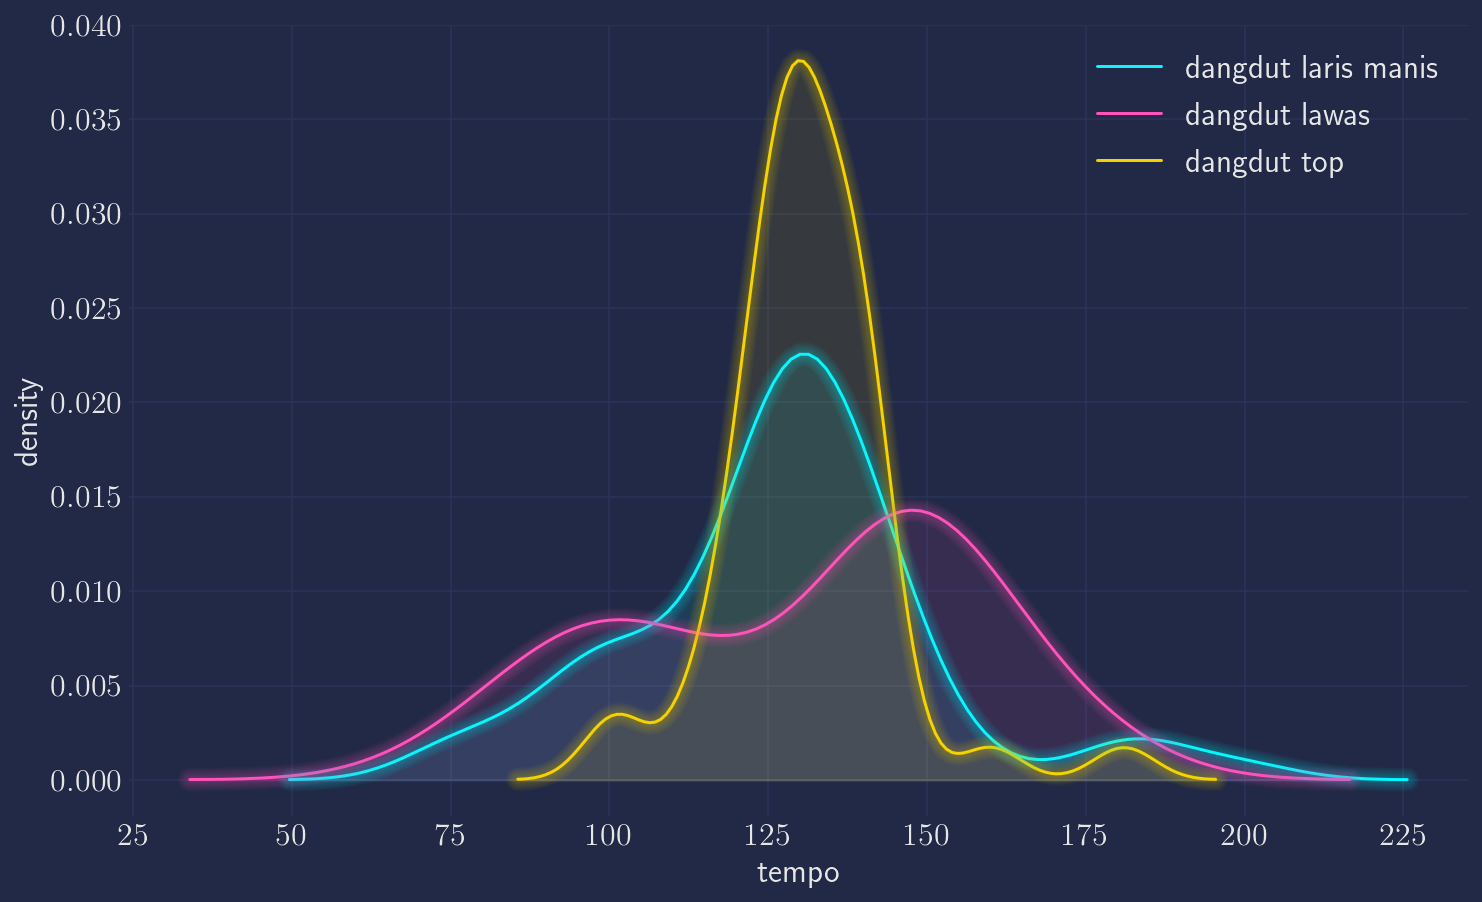

In [163]:
#collapse-hide

draw_density('tempo')

Lagi-lagi kita melihat ada fluktuasi dari tempo lagu seiring dengan progresi *playlist*. Menarik juga untuk melihat bahwa ada tren menurun di akhir *playlist* Dangdut Laris Manis.

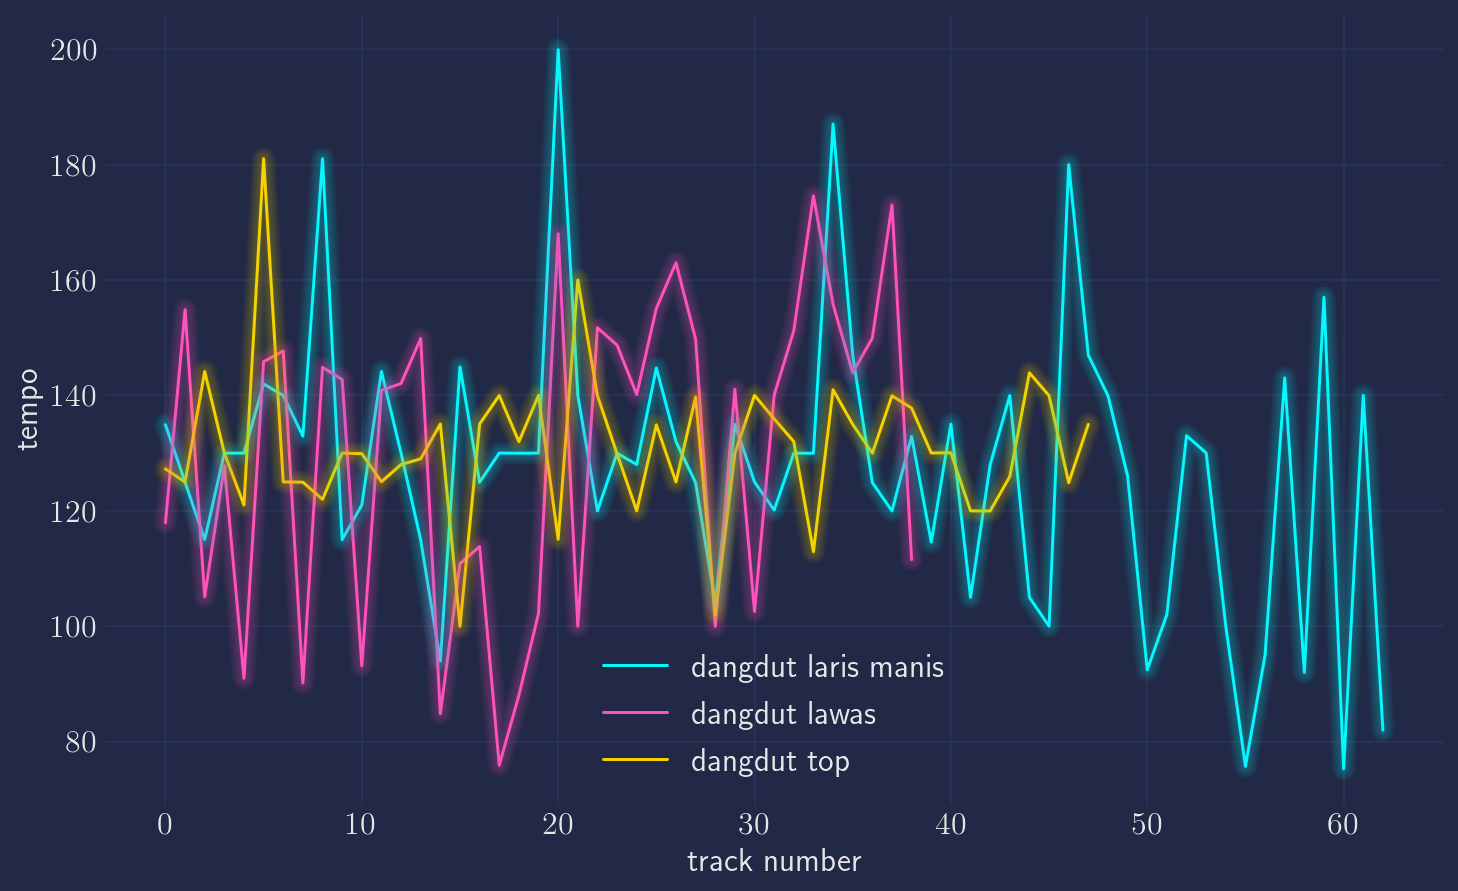

In [164]:
#collapse-hide

draw_trend('tempo')

Meski memang menarik untuk menggambarkan grafik yang sifatnya garis, sayangnya efek pendarnya tidak ada untuk diagram batang. Di bawah ini adalah contoh diagram batang dari fitur `key` atau kunci utama dari lagu.

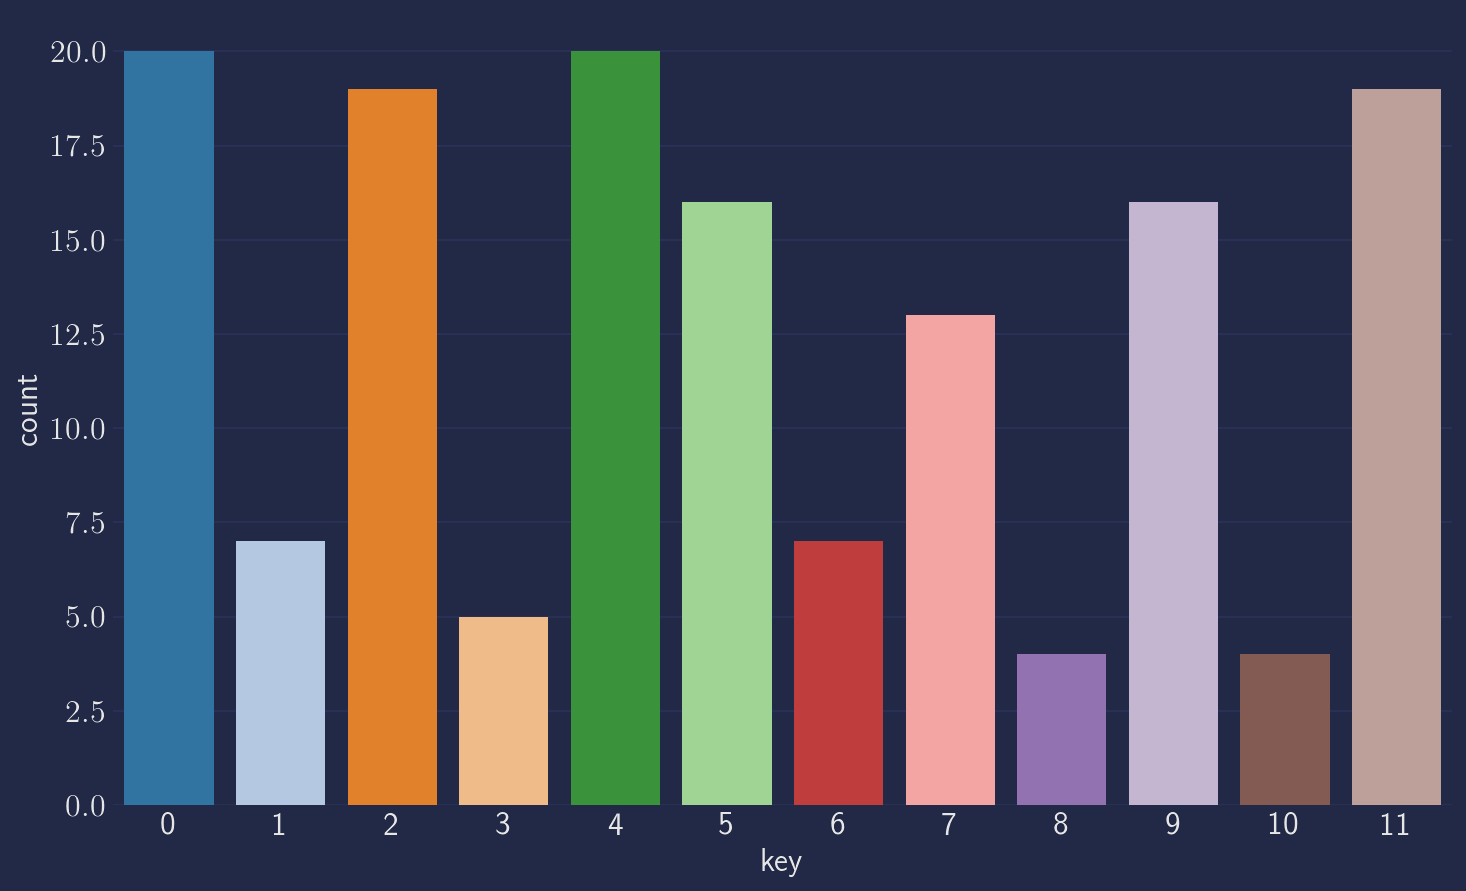

In [165]:
#collapse-hide

fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(df['key'], palette='tab20');

Bagiamana? Tertarik untuk mencoba gaya *cyberpunk* di grafik Anda?